In [1]:
# /usr/bin/env python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df_flow = pd.read_csv('data/flow_train.csv')

In [4]:
df_flow.columns

Index(['date_dt', 'city_code', 'district_code', 'dwell', 'flow_in',
       'flow_out'],
      dtype='object')

In [5]:
df_flow.head(5)

,date_dt,city_code,district_code,dwell,flow_in,flow_out
0,20170601,06d86ef037e4bd311b94467c3320ff38,85792b2278de59316d1158f6a97537ec,118.861740,54.421293,52.089701
1,20170601,5615dc7c1af1f7dabd80bd8b8ecb1ea0,1d86aa481642ba64ef42e2956339bbad,130.333409,235.490857,231.275943
2,20170601,c7537db4101856877ea6381d0174283c,08751b85e3dc67f2e690cf8945a4d85b,98.698267,57.672715,54.252464
3,20170601,5615dc7c1af1f7dabd80bd8b8ecb1ea0,50ec193f67e23ca084bb7af4100c1243,280.984567,571.333345,555.579813
4,20170601,3f7f0ce35d6d0a08377eb2efe2189f4f,dad5b1a26517a039827215846bcaf394,99.126162,72.334678,69.968155


In [11]:
# 只看某一个城市，的人口流动情况
df_group_dist = df_flow.groupby(['district_code'])
# 只随机选取，分组中的第一个区域
print('区域代码:{}'.format(list(df_group_dist)[0][0])) # 打印区域代码
df_dist_a = list(df_group_dist)[0][1]

区域代码:01bb949d16b241654d3be95fa224abc8


In [12]:
# 某一区域的每天流入/流出/驻留人口平均值
df_dist_a.mean()

date_dt     2.017294e+07
dwell       9.679969e+01
flow_in     6.917685e+01
flow_out    6.958238e+01
dtype: float64

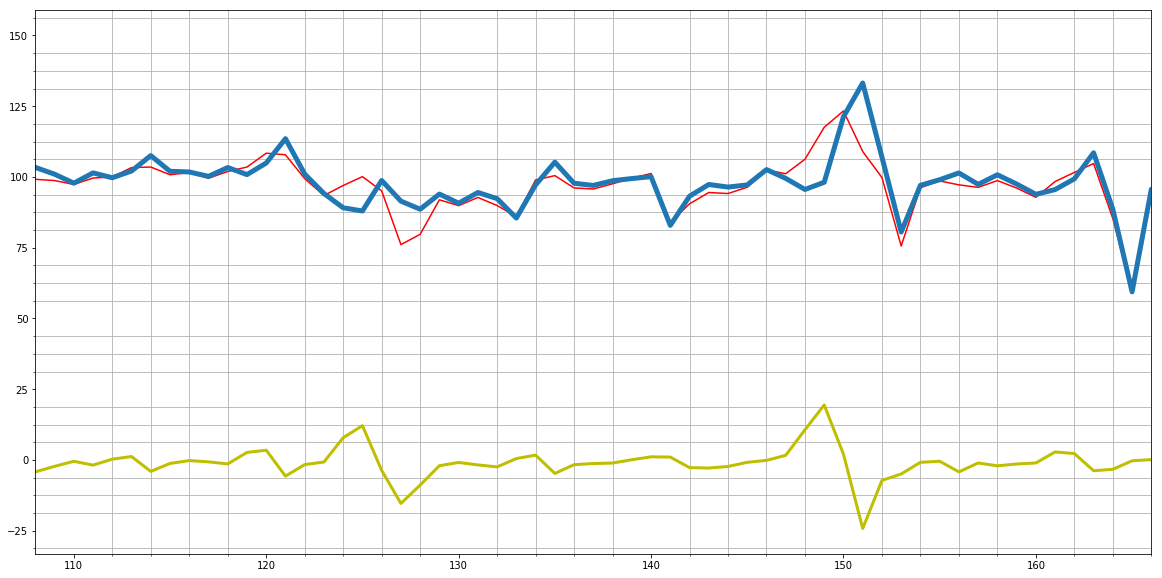

In [47]:
# 某一区域的人口变动图
fig, ax = plt.subplots(figsize=(20, 10))
data_in = df_dist_a['flow_in']
data_out = df_dist_a['flow_out']
data_delta = data_in - data_out
data_resident = df_dist_a['dwell']
data_resident_long = data_resident - data_delta
data_x = np.arange(len(data_in))
ax.set_axisbelow(True)
ax.plot(data_x, data_resident, color='r', label='resident')
#ax.plot(data_x, data_in, color='g', label='in')
#ax.plot(data_x, data_out, color='b', label='out')
ax.plot(data_x, data_delta, color='y', linewidth='3')
ax.plot(data_x, data_resident_long, linewidth='5')
ax.minorticks_on()
ax.grid(which='minor')
step = len(data_in)//10
plt.xlim(0+4*step, len(data_in)-4*step)
plt.show()

上图可以看出：
    1. 该区域人口的流入和流出，基本持平
    2. 流出大于流入，但驻留上升，说明，流出的可能是白天去别的区域工作，晚上回家的，流入的可能大部分是过来住的
    3. 根据2可以

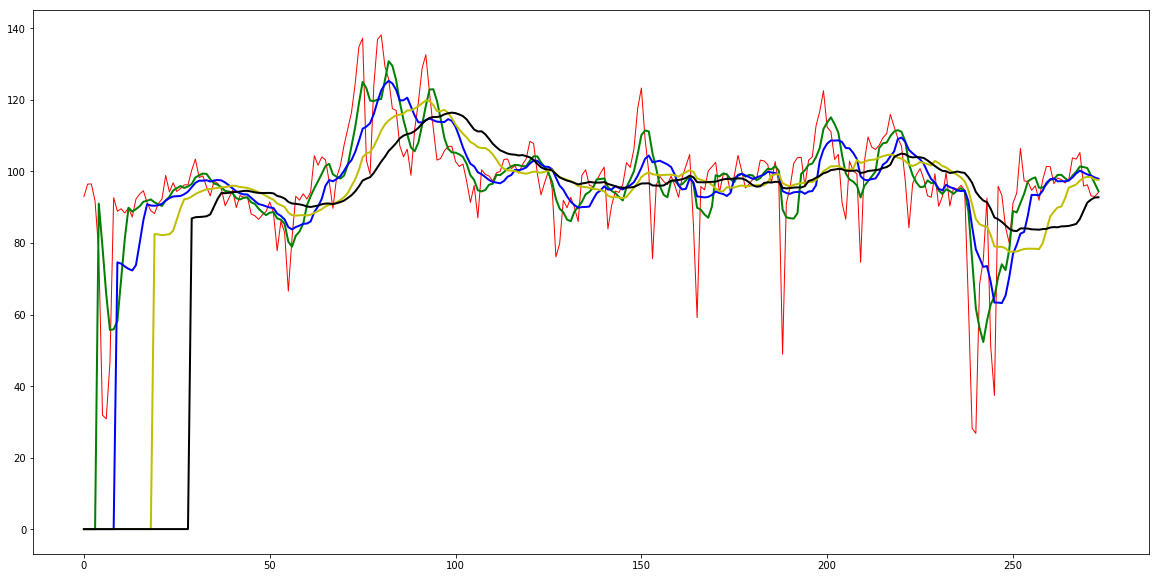

In [35]:
# 画出驻留人口的5，10，20，30日均线，查看变化趋势
data_resident5 = data_resident.rolling(5).mean().fillna(0)
data_resident10 = data_resident.rolling(10).mean().fillna(0)
data_resident20 = data_resident.rolling(20).mean().fillna(0)
data_resident30 = data_resident.rolling(30).mean().fillna(0)
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data_x, data_resident, color='r', linewidth='1')
ax.plot(data_x, data_resident5, color='g', linewidth='2')
ax.plot(data_x, data_resident10, color='b', linewidth='2')
ax.plot(data_x, data_resident20, color='y', linewidth='2')
ax.plot(data_x, data_resident30, color='k', linewidth='2')
plt.show()

In [83]:
df_group_dt = df_dist_a['date_dt'].apply(str)
df_group_dt = pd.to_datetime(df_group_dt)
# fig,ax=plt.subplots()
# ts = pd.Series(np.random.randn(len(df_group_dt)), index=df_group_dt)
# plt.plot(df_group_dt, ts)

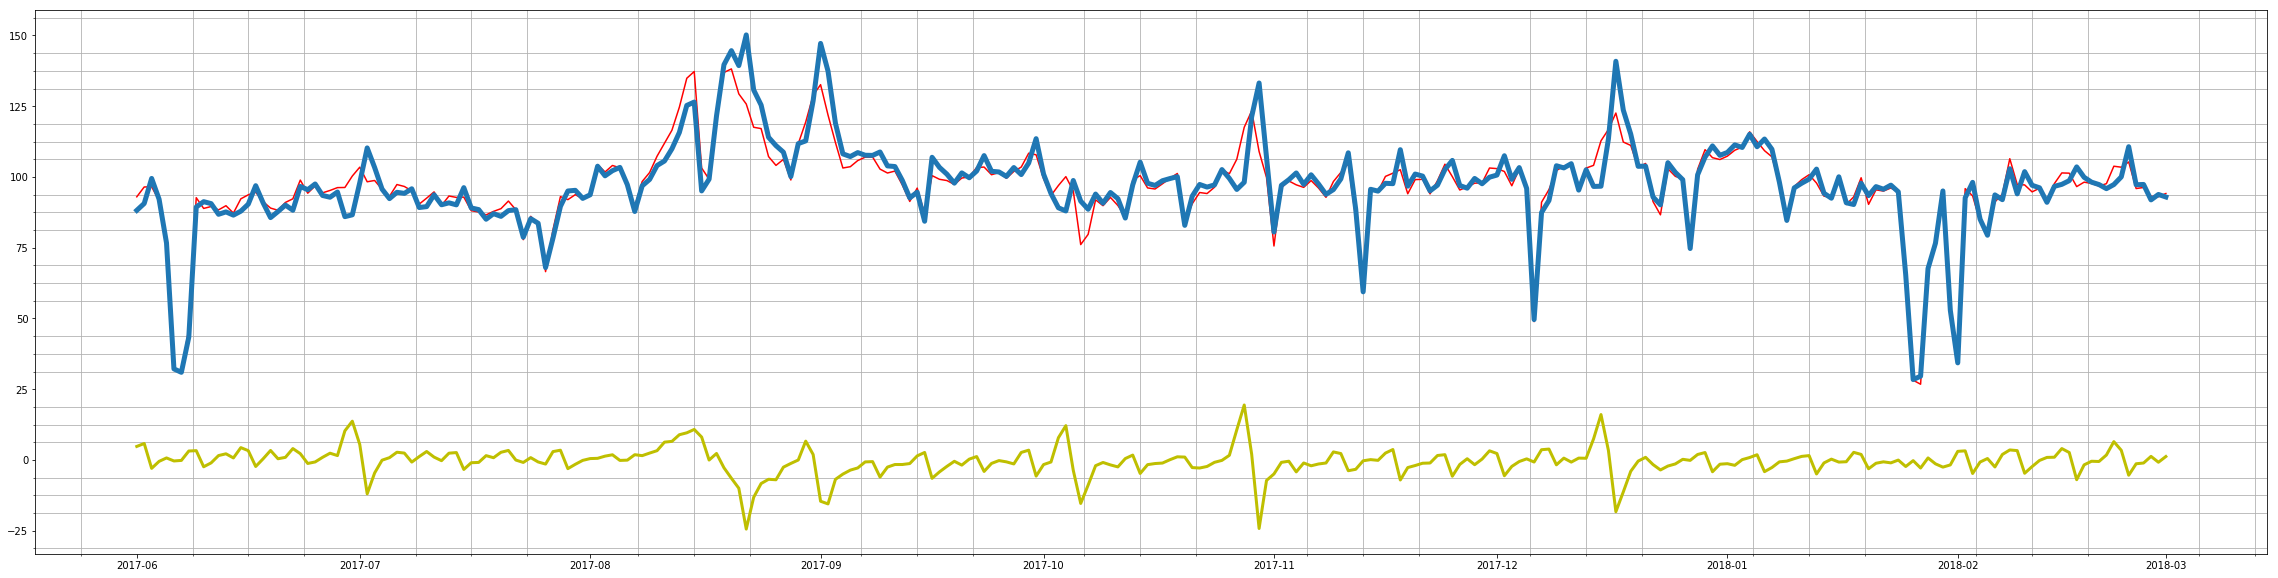

In [102]:
# 某一区域的人口变动图, 以日期为下标
fig, ax = plt.subplots(figsize=(40, 10))
ax.set_axisbelow(True)
ax.plot(df_group_dt, data_resident, color='r', label='resident')
#ax.plot(data_x, data_in, color='g', label='in')
#ax.plot(data_x, data_out, color='b', label='out')
ax.plot(df_group_dt, data_delta, color='y', linewidth='3')
ax.plot(df_group_dt, data_resident_long, linewidth='5')
ax.minorticks_on()
ax.grid(which='minor')
# step = len(data_in)//10
# plt.xlim(0+4*step, len(data_in)-4*step)

78
78


/Users/higgs/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


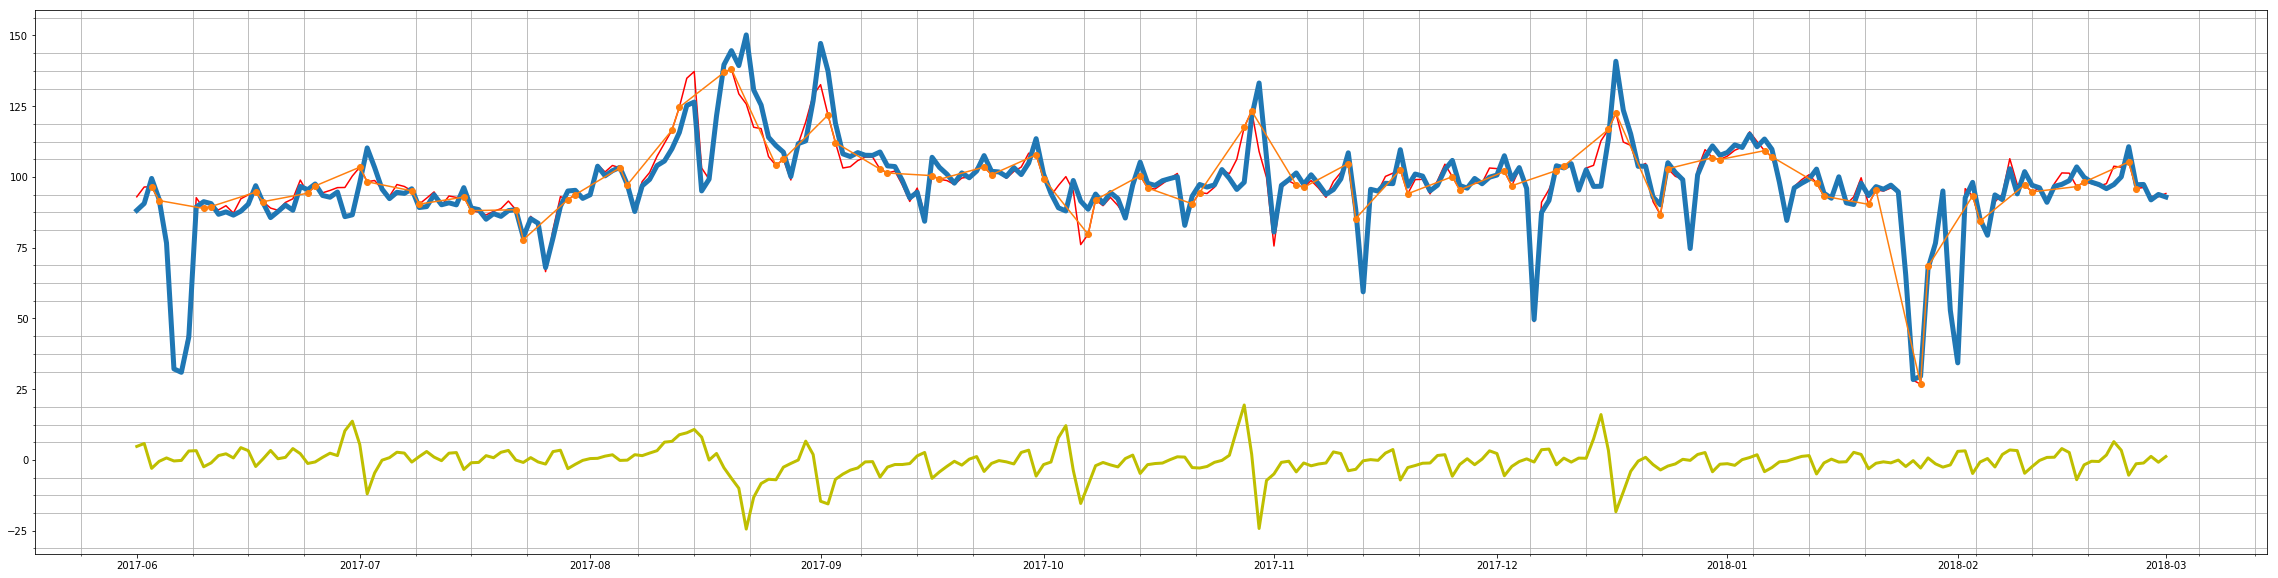

In [156]:
# 将周末的日期单独标示出来
# df_index = df_group_dt.apply(lambda x: x.strftime('%w')) == '6' or df_df_group_dt.apply(lambda x: x.strftime('%w')) == '0'
# print(len(df_group_dt[df_group_dt.apply(lambda x: x.strftime('%w')) == '6']))
df_weekends = df_dist_a[(df_group_dt.apply(lambda x: x.strftime('%w')) == '6') | (df_group_dt.apply(lambda x: x.strftime('%w')) == '0')]
df_weekends['date_dt'] = df_weekends['date_dt'].apply(lambda x: pd.to_datetime(str(x)))
# print(df_weekends['date_dt'])
# fig,ax = plt.subplots(figsize=(40,16))
print(len(pd.to_datetime(df_weekends['date_dt'].apply(str))))
print(len(df_weekends['dwell']))
# plt.plot(pd.to_datetime(df_weekends['date_dt'].apply(str)), df_weekends['dwell'], marker='o')
# plt.scatter(pd.to_datetime(df_weekends['date_dt'].apply(str)), df_weekends['dwell'], marker='o')
df_scatter = df_weekends[['date_dt', 'dwell']]
df_scatter['date_dt'].dtype
fig, ax = plt.subplots(figsize=(40, 10))
ax.set_axisbelow(True)
ax.plot(df_group_dt, data_resident, color='r', label='resident')
#ax.plot(data_x, data_in, color='g', label='in')
#ax.plot(data_x, data_out, color='b', label='out')
ax.plot(df_group_dt, data_delta, color='y', linewidth='3')
ax.plot(df_group_dt, data_resident_long, linewidth='5')
ax.minorticks_on()
ax.grid(which='minor')
ax.plot(df_scatter['date_dt'], df_scatter['dwell'], marker='o')
# df_scatter.plot.scatter(x='date_dt', y='dwell')
# plt.scatter(df_scatter['date_dt'], df_scatter['dwell'], s=100, c='red')

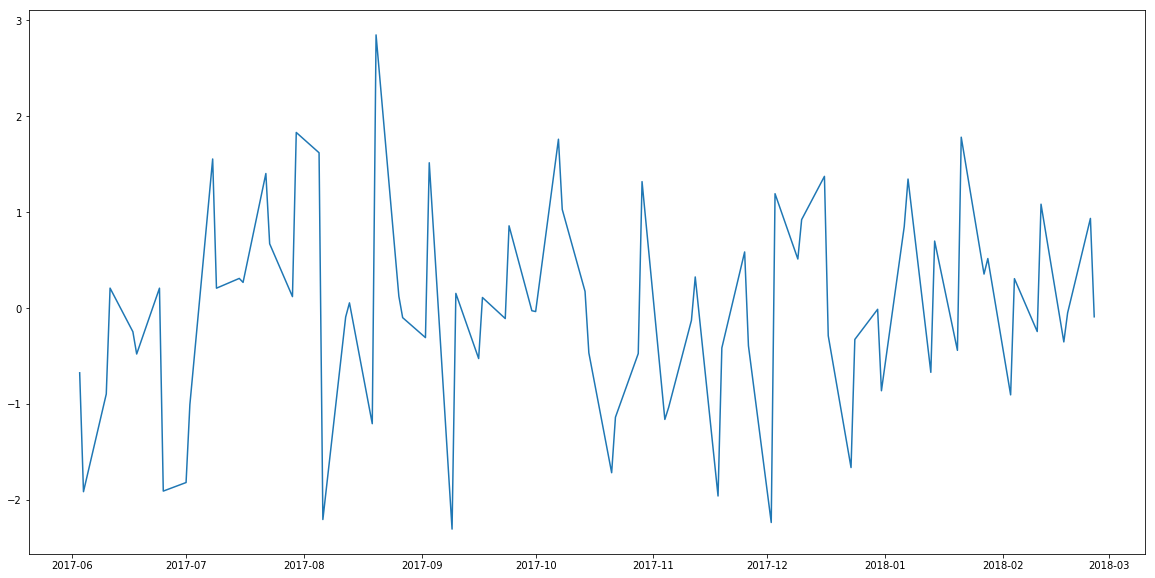

In [146]:
ts = pd.Series(np.random.randn(len(df_scatter['date_dt'])), index=df_scatter['date_dt'])
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(df_scatter['date_dt'], ts)